## Assignment 1


Importing Libraries and Mounting Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from numpy import linalg as lin
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 : K - Nearest Neighbors

 importing data set


In [21]:
with open("drive/MyDrive/Assignment 1/Dataset/imports-85.names") as f:
    print(f.read())

1. Title: 1985 Auto Imports Database

2. Source Information:
   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 19 May 1987
   -- Sources:
     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038 
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037

3. Past Usage:
   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction
      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},
      51--57.
	 -- Predicted price of car using all numeric and Boolean attributes
	 -- Method: an instance-based learning (IBL) algorithm derived from a
	    localized k-nearest neighbor algorithm.  Compared with a
	    linear regression prediction...so all instances
	    with missing attribute values were discarded.  This res

In [22]:
data = pd.read_csv("drive/MyDrive/Assignment 1/Dataset/imports-85.data")
columns =  ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style",  "drive-wheels", "engine-location", 
                "wheel-base", "length", "width", "height", 'curb-weight', "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", 
                "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
data.columns = columns
data.to_csv("drive/MyDrive/Assignment 1/Dataset/automobile.csv", index = None, header = True)
df = pd.read_csv("drive/MyDrive/Assignment 1/Dataset/automobile.csv")

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [24]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [26]:
#finding unique values from each features
unique = []
for col in df.columns:
    unique.append([col, df[col].nunique()])  
unique

[['symboling', 6],
 ['normalized-losses', 52],
 ['make', 22],
 ['fuel-type', 2],
 ['aspiration', 2],
 ['num-of-doors', 3],
 ['body-style', 5],
 ['drive-wheels', 3],
 ['engine-location', 2],
 ['wheel-base', 53],
 ['length', 75],
 ['width', 44],
 ['height', 49],
 ['curb-weight', 171],
 ['engine-type', 7],
 ['num-of-cylinders', 7],
 ['engine-size', 44],
 ['fuel-system', 8],
 ['bore', 39],
 ['stroke', 37],
 ['compression-ratio', 32],
 ['horsepower', 60],
 ['peak-rpm', 24],
 ['city-mpg', 29],
 ['highway-mpg', 30],
 ['price', 186]]

Data Cleaning

In [27]:
#Checking unique values of num-of-doors feature
df["num-of-doors"].unique()

array(['two', 'four', '?'], dtype=object)

In [28]:
#Checking unique values of num-of-cylinders feature
df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [29]:
#replacing num-of-doors and num-of-cylinders to their numerial values
replace_dic = {"num-of-doors" : {"two" : 2, "four": 4},
               "num-of-cylinders": {"two" : 2,"three" : 3, "four" : 4, "five" : 5, "six" : 6, "eight" : 8, "twelve" : 12 }}
df.replace(replace_dic, inplace=True)

#Replacing all '?' to np.nan
df.replace(to_replace = '?', value = np.nan, inplace = True)

Seperating Categorical and Continous Feature 

In [30]:
#Seperating Categorical and Numerical Feature 
categorical_feature = ["make", "fuel-type", "aspiration", "body-style", "drive-wheels", "engine-location", "engine-type", 
                       "fuel-system"]
numerical_features = [col for col in list(df.columns) if col not in categorical_feature]

Converting Data Types of Feature to Category and Float

In [31]:
df[categorical_feature] = df[categorical_feature].astype("category")
df[numerical_features] = df[numerical_features].astype(float)

In [32]:
df.dtypes

symboling             float64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors          float64
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight           float64
engine-type          category
num-of-cylinders      float64
engine-size           float64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
price                 float64
dtype: object

Droping row which have missing values and fill missing values of normalized-loss by mean of that row

In [33]:
#Finding null values in dataset
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [34]:
#droping null values from "price", "num-of-doors", "bore", "stroke", "horsepower", "peak-rpm" row wise
df.dropna(subset=["price", "num-of-doors", "bore", "stroke", "horsepower", "peak-rpm"], inplace=True)
#Filling remaining null values  of normalized-losses feature with mean of that row
df["normalized-losses"].fillna(df["normalized-losses"].mean(), inplace = True)
#Checking for null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Feature Scalling Using Min-Max Scalar for all numerical feature except num-of-doors, num-of-cylinders and price

In [35]:
#Doing Min-Max scaling for all numerical feature except num-of-doors, num-of-cylinders and price
for col in df.columns:
    if df[col].dtype == "float64" and col not in ["num-of-doors", "num-of-cylinders", "price"]:
        min_value = min(df[col])
        max_value = max(df[col])
        df[col] = (df[col] - min_value) / (max_value - min_value)

Label Endoing and One Hot Encoding

In [36]:
#Converting all categorical feature into label encode
for col in categorical_feature:
    df[col] = df[col].cat.codes

#Doing One Hot encoding on all categorical feature
df = pd.get_dummies(df, columns=["make", "fuel-type", "aspiration", "body-style", "drive-wheels", "engine-location", "engine-type", "fuel-system"], drop_first=True)

Finding most correlated feature 

In [37]:
#Finding correlation matrix 
corr_matrix = df.corr()
cor_feature = []

#Storing all the correlation value of feature with price
for col in corr_matrix.columns:
    cor_feature.append( np.abs(corr_matrix [ "price" ] [ col ] )  )

column = list(corr_matrix.columns)
#Sorting the feature according to their corr coeficent
corr_value, column = zip(*sorted(zip(cor_feature, column)))

#Printing Corelation value of price with other feature in accending order
for i, j in zip(column, corr_value):
  print(j, i)

0.0028618236857489115 fuel-system_4
0.0163626856655789 engine-type_4
0.020000619376956855 fuel-system_7
0.028794855829483143 make_10
0.036621714490223514 body-style_4
0.04288864683370949 engine-type_2
0.04306141118269095 make_17
0.04678867495845971 num-of-doors
0.05539439949294604 make_6
0.06287726367883954 fuel-system_6
0.06720450234972758 make_13
0.07453795482131077 compression-ratio
0.08579407744824087 symboling
0.09708209581655548 stroke
0.10158602808099187 make_1
0.1023476616241923 make_20
0.10381888291686761 peak-rpm
0.1095455050828675 make_8
0.11333904262944332 make_3
0.11404663534473748 make_12
0.11551806817654159 fuel-type_1
0.11551806817654162 fuel-system_3
0.12794325268709886 make_14
0.13365445308892465 normalized-losses
0.13473340927702743 make_11
0.1381523131166001 height
0.1416155632345737 make_4
0.1456525999974498 make_21
0.15138396767026166 make_18
0.15175388591827751 body-style_3
0.16988384924571664 make_5
0.18624422240691124 aspiration_1
0.18786901703510012 make_19
0.

In [38]:
#Taking only those feature which have correlation value higher tha 0.68 and lower than -0.68
imp = []
for i, j in zip(column, corr_value):
  if j >= 0.68:
    imp.append(i)
imp

['length',
 'city-mpg',
 'highway-mpg',
 'num-of-cylinders',
 'width',
 'horsepower',
 'curb-weight',
 'engine-size',
 'price']

In [39]:
#changing the dataframe that contain only important feature
df = df[imp]
df.shape

(192, 9)

In [40]:
#Droping these feature because these are affecting the accuracy of model after running for several time
df = df.drop(["city-mpg", "highway-mpg"], axis=1)

In [41]:
df.shape

(192, 7)

Splitting dataset into Feature dataframe and Label dataframe


In [42]:
X = df.drop(["price"], axis=1)
Y = df["price"]

Spliting into Training and Test set

In [43]:
X_train = X.sample(frac = 0.8, random_state= 101)
Y_train = Y[X_train.index]
X_test = X.drop(X_train.index)
Y_test = Y[X_test.index]

Spliting training set into actual_training and validation set

In [44]:
X_actual_train = X_train.sample(frac = 0.8, random_state = 102)
Y_actual_train = Y_train[X_actual_train.index]
X_validation = X_train.drop(X_actual_train.index)
Y_validation = Y_train[X_validation.index]

In [45]:
#Printing the shape of the splitted set
print("Training set shape  -  X_train  : ", X_train.shape, " Y_train  :  ", Y_train.shape)
print("Test set shape  -  X_test  : ", X_test.shape, " Y_test  :  ", Y_test.shape)
print("Actual_train set shape  -  X_actual_train  : ", X_actual_train.shape, " Y_actual_train  :  ", Y_actual_train.shape)
print("Validation set shape  -  X_validation  : ", X_validation.shape, " Y_validation  :  ", Y_validation.shape)

Training set shape  -  X_train  :  (154, 6)  Y_train  :   (154,)
Test set shape  -  X_test  :  (38, 6)  Y_test  :   (38,)
Actual_train set shape  -  X_actual_train  :  (123, 6)  Y_actual_train  :   (123,)
Validation set shape  -  X_validation  :  (31, 6)  Y_validation  :   (31,)


KNN Algorithm

In [46]:
class KNNR():
  #Constructor
    def __init__(self, X, Y, k):
        self.x = np.array(X)
        self.y = np.array(Y)
        self.k = k
    
    def predict(self, X_test):
        X_test = np.array(X_test)
        y = []
        #Taking only one row at a time
        for i in X_test:
          #finding the distance of test point with all training oint
            dis = lin.norm(self.x - i, axis = 1)
            #Sorting that distance
            l1, l2 = zip(*sorted(zip(dis, self.y)))
            #Appending only the mean of k neirest neighbors
            y.append(np.sum(l2[:self.k])/self.k) 
        return y
        
    def error(self, Y_pred, Y_test):
        Y_pred = np.array(Y_pred)
        Y_test = np.array(Y_test)
        #Returing rmse 
        return lin.norm(Y_pred - Y_test)/np.sqrt(len(Y_pred))

1.a Train a k-nearest neighbors regression model, and report its validation set performance using root mean squared error.

In [47]:
obj = KNNR(X_actual_train, Y_actual_train, 2)
ypred = obj.predict(X_validation)
obj.error(Y_validation, ypred)

2140.7518218848318

Finding the best K using 10 fold Cross-Validation

1.b  Find an optimal k for this model using cross-validation

In [48]:
def find_the_best_K(X, Y):
    #this list will contain all rmse error of all k over all validation set
    avg_rmse = []
    #random_state this list will help in choosing diffrent sample every time for spliting actual train data and validation data
    random_state = list(range(101, 111))
    #Value of k cahnge from 1 to 10
    for k in range(1, 10):
        #print("k = ", k)
        rmse = []
        #this loop is for 10 fold cross validaition
        for split in range(10):
            #print("Split == ", split)
            #making actual train set and validation set
            X_train = X.sample(frac = 0.8, random_state= random_state[split])
            Y_train = Y[X_train.index]
            X_test = X.drop(X_train.index)
            Y_test = Y[X_test.index]
            #fitting the actural training set
            obj = KNNR(X_train, Y_train, k)
            #Prediction values on validations set
            pred = obj.predict(X_test)
            #finding rmse value for each validation set
            rmse.append(obj.error(Y_test, pred))
         
        avg_rmse.append(rmse)
        #calculating the best value of k which has minimum rmse 
        best_k = np.argmin(np.sum(avg_rmse, axis = 1)/10) + 1
        
    return avg_rmse, best_k

In [49]:
mse, best_k = find_the_best_K(X_train, Y_train)

In [50]:
print("Optimal value of for this model = ", best_k)

Optimal value of for this model =  2


In [51]:
min_rmse = np.mean(mse[best_k - 1])

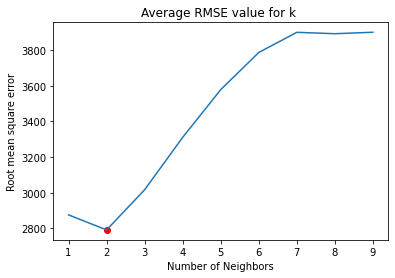

In [52]:
#ploting the graph for 10 fold cross validation
average_mse = list(np.sum(mse, axis=1)/10)
k = list(range(1, 10))
plt.plot(k, average_mse)
plt.scatter(best_k, min_rmse, c ='r')
plt.xlabel("Number of Neighbors")
plt.ylabel("Root mean square error")
plt.title("Average RMSE value for k ")
plt.show()

**Explanation**

It is clearly seen from the plot the min value of rmse come when value of k is equal to 2
<br>
On increaing the value of rmse also increase

Finding Test Set RMSE using best K

In [53]:
obj = KNNR(X_train, Y_train, 2)
Y_pred = obj.predict(X_test)
obj.error(Y_pred, Y_test)

2342.754625828771

# Question 2 : Decision Tree

Importing datset 

In [36]:
with open("drive/MyDrive/Assignment 1/Dataset/adult.names") as f:
    print(f.read())

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [37]:
data = pd.read_csv("drive/MyDrive/Assignment 1/Dataset/adult.data")
columns =  ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",  "relationship", "race", 
                "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "gross-income"]
data.columns = columns
data.to_csv("drive/MyDrive/Assignment 1/Dataset/adult.csv", index = None, header = True)
df = pd.read_csv("drive/MyDrive/Assignment 1/Dataset/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gross-income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [38]:
df.shape

(32560, 15)

Handling Missing Values

In [39]:
#Replacing all '?' to np.nan value
df.replace(to_replace=' ?', value = np.nan, inplace=True)
#converting label to binary value for easy classification
df.replace(to_replace=" <=50K",  value = 0, inplace=True)
df.replace(to_replace=" >50K", value=1, inplace=True)
#Checking for Null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
gross-income         0
dtype: int64

In [40]:
#Droping all the row which has null value
df.dropna(axis="index", inplace=True)
#Checking for null value
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
gross-income      0
dtype: int64

In [41]:
df.shape

(30161, 15)

Seperating Categorical and Numerical Features and Converting it data types

In [42]:
#Seperating Categorical and Numerical Features 
categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
numerical_features = [col for col in df.columns if col not in categorical_features]

In [43]:
#Converting the datatype of categorical features from object to category
df[categorical_features] = df[categorical_features].astype("category")

Label encoding

In [44]:
for col in categorical_features:
    df[col] = df[col].cat.codes

Spliting Dataset into Features and labels

In [45]:
X = df.drop(["gross-income"], axis = 1)
Y = df["gross-income"]

Creating training and test set

In [46]:
X_train = X.sample(frac = 0.8, random_state= 101)
Y_train = Y[X_train.index]
X_test = X.drop(X_train.index)
Y_test = Y[X_test.index]

spliting training set into actual_train and validation set

In [47]:
X_actual_train = X_train.sample(frac = 0.8, random_state = 102)
Y_actual_train = Y_train[X_actual_train.index]
X_validation = X_train.drop(X_actual_train.index)
Y_validation = Y_train[X_validation.index]

In [48]:
#Printing the size of all splitted set
print("Training set shape  -  X_train  : ", X_train.shape, " Y_train  :  ", Y_train.shape)
print("Test set shape  -  X_test  : ", X_test.shape, " Y_test  :  ", Y_test.shape)
print("Actual_train set shape  -  X_actual_train  : ", X_actual_train.shape, " Y_actual_train  :  ", Y_actual_train.shape)
print("Validation set shape  -  X_validation  : ", X_validation.shape, " Y_validation  :  ", Y_validation.shape)

Training set shape  -  X_train  :  (24129, 14)  Y_train  :   (24129,)
Test set shape  -  X_test  :  (6032, 14)  Y_test  :   (6032,)
Actual_train set shape  -  X_actual_train  :  (19303, 14)  Y_actual_train  :   (19303,)
Validation set shape  -  X_validation  :  (4826, 14)  Y_validation  :   (4826,)


**Decision Tree Algorithm**
<br>

I am taking refrence from profesor's code from Demo class 

In [79]:
class Node():
    #Constructor
    def __init__(self, depth = 0, parent = None, bestFeature = 0, thresold = 0):
        self.parent = parent
        self.left = None
        self.right = None
        self.leaf = None
        self.bestFeature = bestFeature
        self.thresold = thresold
        self.label = None
        self.depth = depth

    def entropy(self, n , n1):
      #Function for calculating entriopy Arguments = {Total size of y , total number of 1}
      # n0 = number of zeros in y
      n0 = n - n1
      #returning the entropy for given values of y
      return -((n1 / n) * np.log2(n1 / n) + (n0 / n)*np.log2(n0 / n))
        
    def information_gain(self, X, Y):
      #This function is used for splitting node using information gain
        
        #n = number of sample in dataset X
        n = X.shape[0]
        
        #calculating the entropy of current dataset
        curent_entropy = self.entropy(n, sum(Y))

        #Seting the best info gain negative infinity
        bestIG = -float("inf")

        #Defingin bestcol and bestFeature variable
        bestcol = 0
        bestthresold = 0

        #Loop for using all coll from datset for finding the best feature
        for col in range(X.shape[1]):
            
            # This will help in not using the same feature again and again
            if self.parent is not None and col == self.parent.bestFeature:
                continue
            
            #Sorting the value of X and Y according to values of X
            x_sorted = np.sort(X[:, col])
            index = np.argsort(X[:, col])
            ysorted = Y[index]
            #x_sorted, ysorted = zip(*sorted(zip(X[:, col], Y)))

            #calculation cummulative sum in forward and reverse direction for fast entropy calculation.
            #This will only work if labels are 0 and 1
            y_cum_for = np.cumsum(ysorted)
            y_cum_rev = np.cumsum(ysorted[::-1])[::-1]
            #step = int(len(x_sorted) / 1)

            #This loop is finding for best thresold in each column by calculation informatio gain
            for i in range(1, len(x_sorted) - 1):

              #Thresold  = current value in x
                thresold = x_sorted[i]
                #calculation information gain 
                info_gain = curent_entropy - ((i + 1) / n) * self.entropy(i + 1, y_cum_for[i]) - ((n - i -1) / n) * self.entropy(n -i -1, y_cum_rev[i+1])
                
                #Checking for best info gain from all possible value from each feature and setting the amrk for best feature and thresold which has maximum inforamtion gain
                if info_gain > bestIG:
                    bestIG = info_gain
                    bestcol = col
                    bestthresold = thresold
                              
        return bestcol, bestthresold

    
    def build_tree(self, X, Y, min_sample, max_depth):

        #This function is used for building tree

        #For making leaf node if num of sample is below thresold node have reached the maximum height
        if Y.size < min_sample or self.depth > max_depth:
            self.leaf = True
            self.label = 0 if np.mean(Y) < 0.5 else 1
            
        else:
          #if node is not leaf 
            self.leaf = False
            #Finding the bestfeature and bestthresold for current dataset
            self.bestFeature, self.thresold = self.information_gain(X, Y)
            #Making new Left node and right Node
            self.left = Node(depth = self.depth + 1, parent = self)
            self.right = Node(depth = self.depth + 1, parent = self)
            
            #Splitting the dataset into two parts
            seperator = X[:, self.bestFeature] - self.thresold
            #Caling the build tree funtion recursively for left and right subtree
            self.left.build_tree(X[seperator <= 0, :], Y[seperator <= 0], min_sample, max_depth)
            self.right.build_tree(X[seperator > 0, :], Y[seperator > 0], min_sample, max_depth)
            
    
    
    def predict(self, data):
      #This function is used for finding the label for single data vector
        if self.leaf:
            return self.label
        if data[self.bestFeature] > self.thresold:
            return self.right.predict(data)
        else:
            return self.left.predict(data)
    


In [80]:
class DesicionTree():
    #this class is responsible for Decision tree classification
    #Contructor
    def __init__(self,X, Y, min_sample, max_depth):
        self.root = Node()
        self.X = np.array(X)
        self.Y = np.array(Y)
        self.min_sample = min_sample
        self.max_depth = max_depth
        
        
    def train(self):
      #Function for buildng tree
        self.root.build_tree(self.X, self.Y, self.min_sample, self.max_depth)
        
    def predict(self, X):
      #Function for finding laebls for each vector from test dataset
        y = []
        for row in np.array(X):
            y.append(self.root.predict(row))
        return y
    
    def accuracy(self, y_test, ypred):
      #This function is used for calculation the accuracy of original values and predicted values
        l = []
        for i, j in zip(y_test, ypred):
            if i == j:
                l.append(1)
            else:
                l.append(0)
          #Returning the percentage accuracy
        return sum(l) * 100 / len(l)

2.a : Train a decision tree classification model using information gain as the splitting criterion and using only single feature decision stumps at all non-leaf nodes and majority votes at leaf nodes, and report its validation set performance using % accuracy

In [81]:
obj = DesicionTree(X_actual_train,Y_actual_train, 300, 7)
obj.train()
pred = obj.predict(X_validation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [82]:
print("Validation set accuracy = {0:0.2f}%". format(obj.accuracy(pred, Y_validation)))

Validation set accuracy = 84.56%


Cross validation
<br>
2.b Use cross-validation to optimize the tree hyperparameters

In [62]:
def best_hyperparameter(X, Y):
  avg_acc = []
  #random_state this list will help in choosing diffrent sample every time for spliting actual train data and validation data
  random_state = list(range(10, 1000, 100))
  #Defineing the range for depth
  depth = list(range(3, 13))
  #Definening the range for max leaf size
  maxleaf = list(range(100, 1001, 100))

  #Loop for each value from depth
  for d in depth:
    print("depth = ",d)
    #Loop for each value of maxleafsize
    for ml in maxleaf:
      acc = []
      #This loop is for 4 fold cross validation
      for k in range(4):
        #Splitting the training data into actual train set and validation set
        X_train = X.sample(frac = 0.7, random_state= random_state[k])
        Y_train = Y[X_train.index]
        X_test = X.drop(X_train.index)
        Y_test = Y[X_test.index]
        #training model on actual train set
        obj = DesicionTree(X_train, Y_train, ml, d)
        obj.train()
        #prediction the values for Validation set
        pred = obj.predict(X_test)
        accuracy = obj.accuracy(pred, Y_test)
        #appending the value of all accuracy over all values of depth and maxliafsize
        acc.append(accuracy)
      avg_acc.append([d, ml, acc])
   #Returning the list containg all accuracy for particular depth and maxleafsize   
  return avg_acc


In [ ]:
avg_acc = best_hyperparameter(X_train, Y_train)

depth =  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


depth =  4
depth =  5
depth =  6
depth =  7
depth =  8
depth =  9
depth =  10
depth =  11
depth =  12


In [ ]:
#sorting the list for finding the best depth and min leaf size
acc = []
for i in avg_acc:
  acc.append([np.mean(i[2]), i[0], i[1]])
acc = sorted(acc, key = lambda a:a[0])
acc

[[83.65451029147673, 3, 800],
 [83.65451029147673, 3, 900],
 [83.65451029147673, 3, 1000],
 [83.74775521480868, 4, 800],
 [83.74775521480868, 4, 900],
 [83.74775521480868, 4, 1000],
 [84.0033153750518, 3, 700],
 [84.04130404752038, 11, 800],
 [84.04130404752038, 12, 800],
 [84.04821107887831, 10, 800],
 [84.06202514159415, 9, 800],
 [84.0654786572731, 8, 800],
 [84.0654786572731, 9, 900],
 [84.0654786572731, 10, 900],
 [84.0654786572731, 11, 900],
 [84.0654786572731, 12, 900],
 [84.06893217295207, 8, 900],
 [84.08619975134687, 5, 800],
 [84.08965326702582, 5, 900],
 [84.08965326702582, 5, 1000],
 [84.08965326702584, 4, 700],
 [84.15527006492609, 3, 100],
 [84.15527006492609, 3, 200],
 [84.15527006492609, 3, 300],
 [84.15527006492609, 3, 400],
 [84.15527006492609, 3, 500],
 [84.15527006492609, 3, 600],
 [84.22088686282635, 6, 1000],
 [84.22434037850533, 6, 800],
 [84.22434037850533, 9, 1000],
 [84.22434037850533, 10, 1000],
 [84.22434037850533, 11, 1000],
 [84.22434037850533, 12, 1000],

In [ ]:
bestacc, bestdepth , bestleafsize = acc[-1]

In [ ]:
print(" Best Depth =  ", bestdepth)
print(" Best leaf size = ", bestleafsize) 
print(" Best accuracy = ", bestacc)

 Best Depth =   6
 Best leaf size =  100
 Best accuracy =  85.02555601602431


In [64]:
 bestdepth =   6
 bestleafsize =  100

Using best parameters for test set

In [65]:
obj = DesicionTree(X_train, Y_train, bestleafsize, bestdepth)
obj.train()
pred = obj.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [66]:
print("Accuracy on test set useing best hyperparameter = {0:0.2f} %".format(obj.accuracy(pred, Y_test) ))

Accuracy on test set useing best hyperparameter = 84.25 %


2.c : Improve on the best test set performance this classifier has to offer with a better version that uses more complex splitting criteria than single-feature decision stumps

Using KNNR for labeling leaf in place mode. If mean < 0.5 label will be equal to zero otherwise 1.

In [68]:
class NodeKNN():

  #Just same as above calss Only diffrence is that we are using KNN for deciding the value of leaf
    
    def __init__(self, depth = 0, parent = None, bestFeature = 0, thresold = 0):
        self.parent = parent
        self.left = None
        self.right = None
        self.leaf = None
        self.bestFeature = bestFeature
        self.thresold = thresold
        self.label = None
        self.depth = depth
    
    def entropy(self, n , n1):
      n0 = n - n1
      return -((n1 / n) * np.log2(n1 / n) + (n0 / n)*np.log2(n0 / n))
        
    def information_gain(self, X, Y):
        n = X.shape[0]
        curent_entropy = self.entropy(n, sum(Y))
        bestIG = -float("inf")
        bestcol = 0
        bestthresold = 0
        for col in range(X.shape[1]):
            
            if self.parent is not None and col == self.parent.bestFeature:
                continue
            
            x_sorted = np.sort(X[:, col])
            idx = np.argsort(X[:, col])
            ysorted = Y[idx]
            y_cum_for = np.cumsum(ysorted)
            y_cum_rev = np.cumsum(ysorted[::-1])[::-1]
            for i in range(1, len(x_sorted) - 1):
                thresold = x_sorted[i]
                info_gain = curent_entropy - ((i + 1) / n) * self.entropy(i + 1, y_cum_for[i]) - ((n - i -1) / n) * self.entropy(n -i -1, y_cum_rev[i+1])
                
                if info_gain > bestIG:
                    bestIG = info_gain
                    bestcol = col
                    bestthresold = thresold
                         
        return bestcol, bestthresold

    
    def fit(self, X, Y, min_sample, max_depth):
        
        if Y.size < min_sample or self.depth > max_depth:
            self.leaf = True


""" 
This is where we are creating the object for KNNR with datset X, label Y and value of k  = 5


"""

            obj = KNNR(X, Y, 5)
            self.label = obj
            
        else:
            self.leaf = False
            self.bestFeature, self.thresold = self.information_gain(X, Y)
            self.left = NodeKNN(depth = self.depth + 1, parent = self)
            self.right = NodeKNN(depth = self.depth + 1, parent = self)
            
            seperator = X[:, self.bestFeature] - self.thresold
            self.left.fit(X[seperator <= 0, :], Y[seperator <= 0], min_sample, max_depth)
            self.right.fit(X[seperator > 0, :], Y[seperator > 0], min_sample, max_depth)
            
    
    
    def predict(self, data):
        if self.leaf:

          """
          This is where we are calculation the value of label assigning 0 if mean is less than 0.5 otherwise 1
          """
            x = np.mean(self.label.predict(data))
            return 0 if  x < 0.5 else 1
        if data[self.bestFeature] > self.thresold:
            return self.right.predict(data)
        else:
            return self.left.predict(data)
    


In [67]:
class TreeKNN():
    #Same as above tree class
    
    def __init__(self,X, Y, min_sample, max_depth):
        self.root = NodeKNN()
        self.X = np.array(X)
        self.Y = np.array(Y)
        self.min_sample = min_sample
        self.max_depth = max_depth
        
        
    def train(self):
        self.root.fit(self.X, self.Y, self.min_sample, self.max_depth)
        
    def predict(self, X):
        y = []
        for row in np.array(X):
            y.append(self.root.predict(row))
        return y
    
    def accuracy(self, y_test, ypred):
        l = []
        for i, j in zip(y_test, ypred):
            if i == j:
                l.append(1)
            else:
                l.append(0)
                
        return sum(l) * 100 / len(l)

In [ ]:
obj = TreeKNN(X_train, Y_train, bestleafsize, bestdepth)
obj.train()
pred = obj.predict(X_test)
print("Accuracy = ", obj.accuracy(pred, Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Accuracy =  81.66445623342175


In [ ]:
print("Accuracy = ", obj.accuracy(pred, Y_test))

Accuracy =  81.66445623342175
